In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.cm as cm
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis
import statistics as s
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

#getting the data set
data=pd.read_csv('brain_stroke.csv',index_col=0)
data.head(-5)
#print(data)
#print(data.isna().sum())
#print(data.info())

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))


#establishing the training set and the test set
X=data.drop(["stroke"],axis=1)
y=data["stroke"]

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

#take number of features equal to number of components 
ica = FastICA(n_components=9, random_state=42,max_iter=800).fit(X)
X_red=ica.transform(X)
mean=np.mean(kurtosis(X_red, fisher=False))
print(mean)
print(kurtosis(X_red, fisher=False))
X_red_new=np.array([X_red[:,0],X_red[:,1],X_red[:,5]])
X_red_new=np.transpose(X_red_new)
print(X_red_new)

C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


4.727120567410507
[ 8.46472035 16.13213942  1.76670545  1.61049746  1.00206432  4.84432636
  2.94172878  3.53491763  2.24698534]
[[-0.00917945 -0.0593354   0.03008741]
 [-0.00950789 -0.0587207  -0.0075053 ]
 [-0.00481568  0.00305219  0.02217529]
 ...
 [ 0.04370423  0.00510053 -0.012595  ]
 [-0.00488644  0.00348756 -0.00660599]
 [ 0.04407225  0.00515732 -0.01194154]]


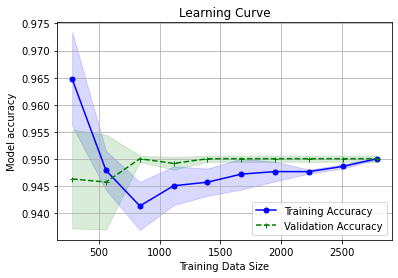

Training set score: 0.950211
Training set loss: 0.159304
The accuracy is:  95.05016722408027 %
Execution time in seconds: 0.2727689743041992


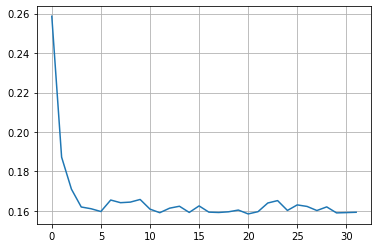

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X_red,y,test_size=0.3,random_state=42,stratify=y)
x_train.shape, x_test.shape

#learning curve
train_size, train_score2, test_score2=learning_curve(MLPClassifier(activation='relu',random_state=42,max_iter=1000,learning_rate_init=0.1, hidden_layer_sizes=(100,)), x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), scoring="accuracy",cv=5)
train_mean = np.mean(train_score2, axis=1)
test_mean = np.mean(test_score2, axis=1)
train_std = np.std(train_score2, axis=1)
test_std = np.std(test_score2, axis=1)
plt.plot(train_size, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_size, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_size, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_size, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

##Neural Network
import time
startTime = time.time()
dt = MLPClassifier(activation='relu',learning_rate='adaptive',random_state=42,max_iter=1000,learning_rate_init=0.1, hidden_layer_sizes=100).fit(x_train, y_train)
print("Training set score: %f" % dt.score(X_red, y))
print("Training set loss: %f" % dt.loss_)
plt.plot(dt.loss_curve_)
plt.grid()

#Evaluate the accuracy of the model
y_pred = dt.predict(x_test)
predictions = metrics.accuracy_score(y_test, y_pred)
#Calculating the accuracy in percentage
print('The accuracy is: ', predictions * 100, '%')
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))